# Project 1 - Data science job postings on Glassdoor

## Questions 
1) Can you make the salary column into integers?
2) What information can you extract out of job descriptions?
3) How can you remove the numbers from the company name?
4) How can you create some new feature? (e.g. state column from each location column)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./Uncleaned_DS_jobs.csv")

In [2]:
# 1. Can you make the salary column into integers?

# Check if any null values in 'Salary Estimate' column
if df['Salary Estimate'].isnull().any():
    print("Null values present in 'Salary Estimate' column")

# Extract min and max salary using a function
def extract_salary(salary_range):
    salary_values = salary_range.replace("$", "").replace("K", "").split("(")[0].split("-")
    return int(salary_values[0]), int(salary_values[1])

# Apply the function to create new 'Min Salary' and 'Max Salary' columns
df[['Min Salary', 'Max Salary']] = df['Salary Estimate'].apply(extract_salary).apply(pd.Series)


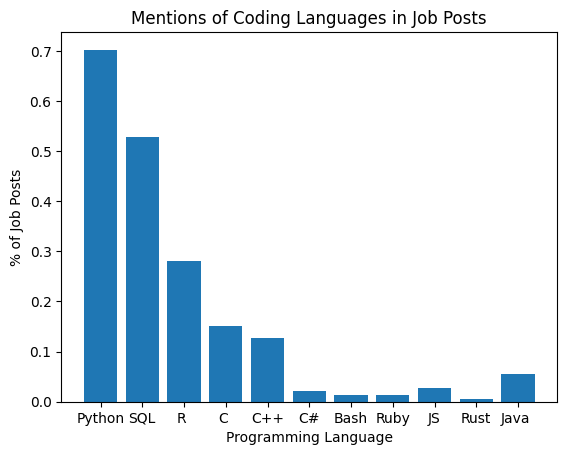

In [3]:
# 2. What information can you extract out of job descriptions?

# Check if any null values in 'Job Descriptions' column
if df['Job Description'].isnull().any():
    print("Null values present in 'Job Description' column")
    
num_descriptions = (len(df['Job Description']))

# We can count how often a certain programming language is mentioned
languages = {"Python": 0, "SQL": 0,"R ": 0, "C ": 0, "C++": 0, "C#": 0,"Bash": 0, "Ruby": 0, "JS": 0, "Rust": 0,"Java ": 0}

for description in df['Job Description']:
    for language in languages.keys():
        if language in description:
            languages[language] += 1

language = list(languages.keys())
values = [i/num_descriptions for i in list(languages.values())]

#Plot bar chart
plt.bar(language, values)
plt.ylabel("% of Job Posts")
plt.xlabel("Programming Language")
plt.title("Mentions of Coding Languages in Job Posts")
plt.show()

In [4]:
# 3) How can you remove the numbers from the company name?

# Check if any null values in 'Company Name' column
if df['Company Name'].isnull().any():
    print("Null values present in 'Company Name' column")

def remove_numbers(company_name):
    no_num_name = company_name.split("\n")
    return no_num_name[0]



# Apply the function to update Company_Name column
df[['Company Name']] = df['Company Name'].apply(remove_numbers).apply(pd.Series)

In [5]:
# 4) How can you create some new feature? (e.g. state column from each location column)

# Check if any null values in 'Locations' column
if df['Location'].isnull().any():
    print("Null values present in 'Locations' column")

# Clean entries that do not follow the format "city, state"
indices_to_clean = []
for idx, state in enumerate(df['Location']):
    split = state.split(",")
    if len(split) <= 1:
        if df['Location'][idx] == "New Jersey":
            df.loc[idx, 'Location'] = "NJ"
        elif df['Location'][idx] == "Utah":
            df.loc[idx, 'Location'] = "UT"
        elif df['Location'][idx] == "Texas":
            df.loc[idx, 'Location'] = "TX"
        elif df['Location'][idx] == "California":
            df.loc[idx, 'Location'] = "CA"
        else:
            df.loc[idx, 'Location'] = "Not Specified"
        
        
def get_state(location):
    state = location.split(",")
    return state[1] if len(state) > 1 else state[0]



# Apply the function to create 'State' column
df[['State']] = df['Location'].apply(get_state).apply(pd.Series)